In [1]:
# 实现k-NN分类和回归问题
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

D:\anaconda\install\envs\dev\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


predict value [0]


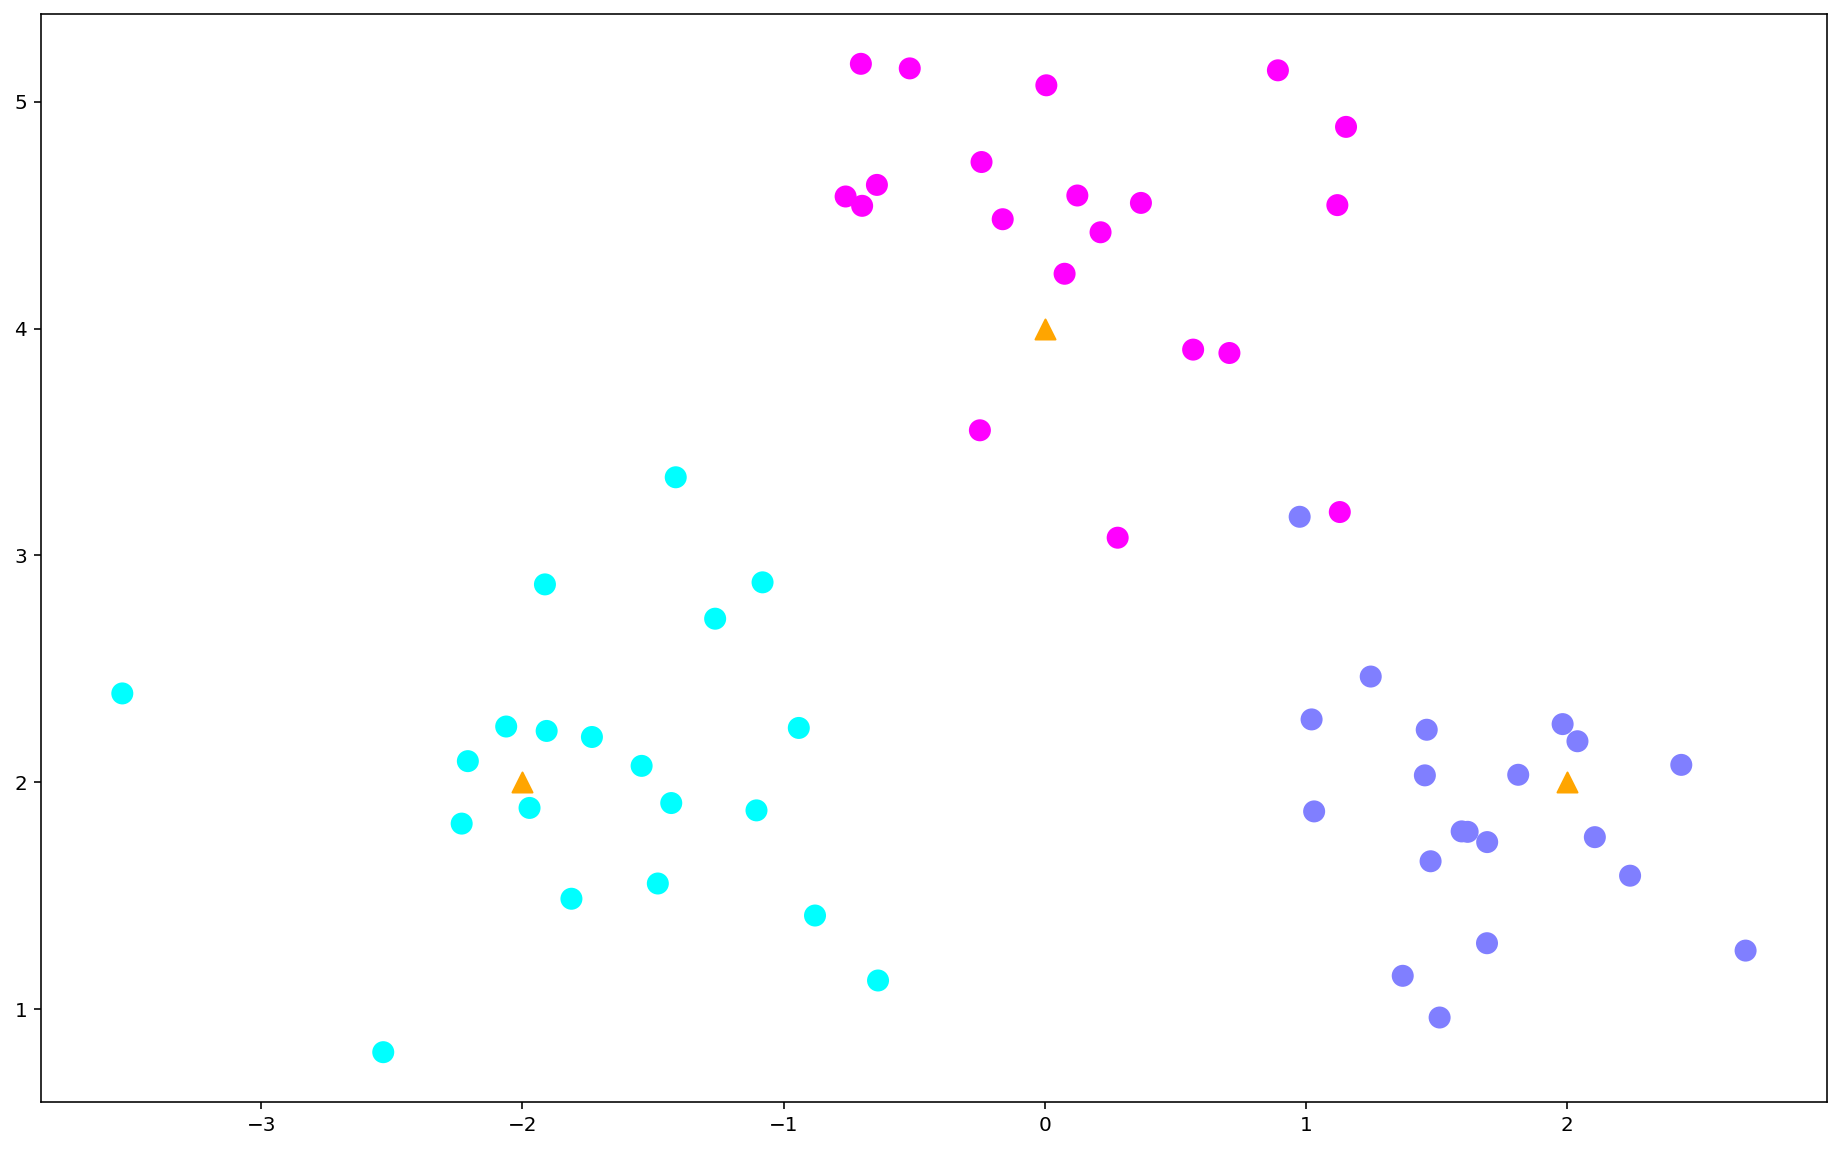

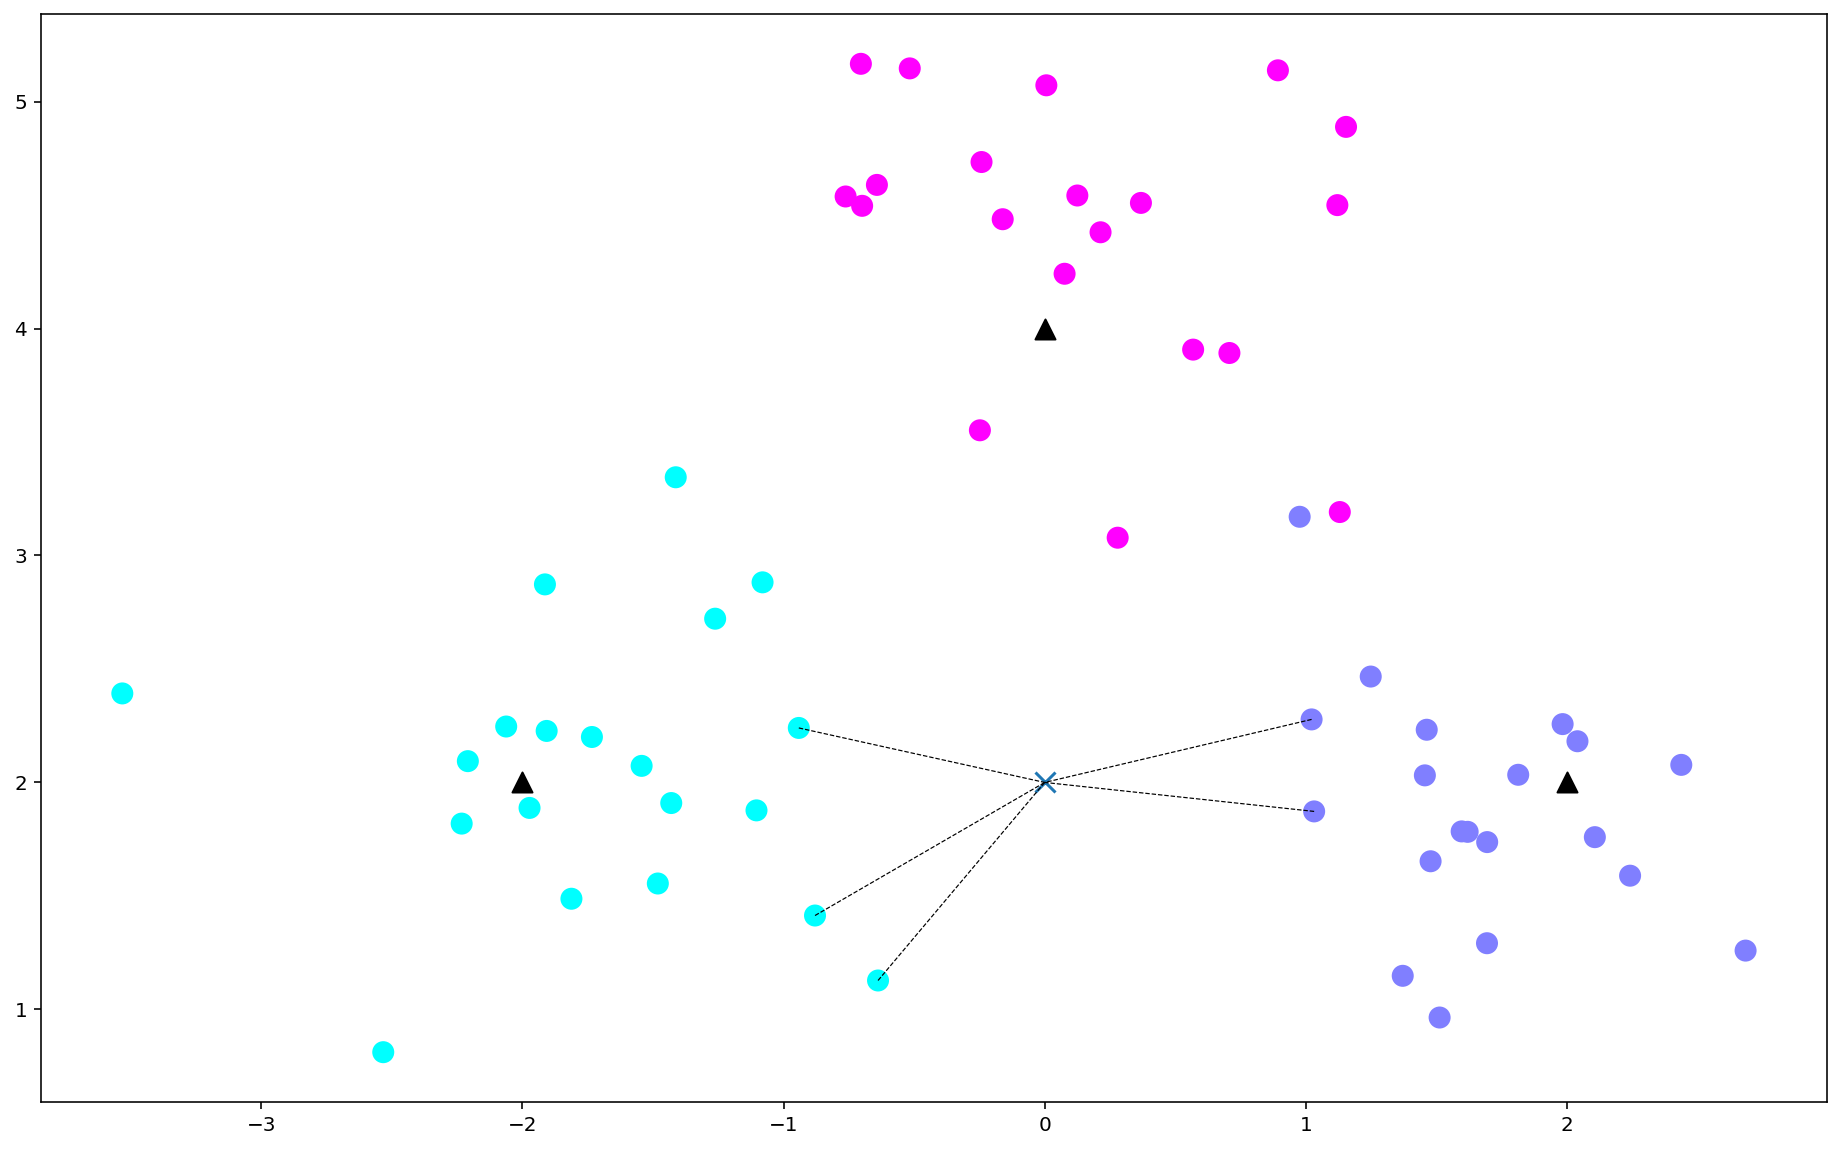

In [2]:
# 实现分类

#生成数据
centers = [[-2, 2], [2, 2], [0, 4]]
x, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)
plt.figure(figsize=(16,10), dpi=144)
c = np.array(centers)
# 画出样本
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='cool')
# 画中心点
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='orange')

# 训练模型
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x, y)
# 新样本进行预测
x_sample = np.array([[0, 2]])
y_sample = clf.predict(x_sample)
neighbors = clf.kneighbors(x_sample, return_distance=False)
#画出示意图
plt.figure(figsize=(16,10), dpi=144)
c = np.array(centers)
plt.scatter(x[:,0], x[:,1], c=y, s=100, cmap='cool') # 样本点
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='k') # 中心点
plt.scatter(x_sample[0][0], x_sample[0][1], marker="x", s=100, cmap='cool') # 待预测点
for i in neighbors[0]:
    plt.plot([x[i][0], x_sample[0][0]], [x[i][1], x_sample[0][1]], 'k--', linewidth=0.6)
print(f"predict value {y_sample}")

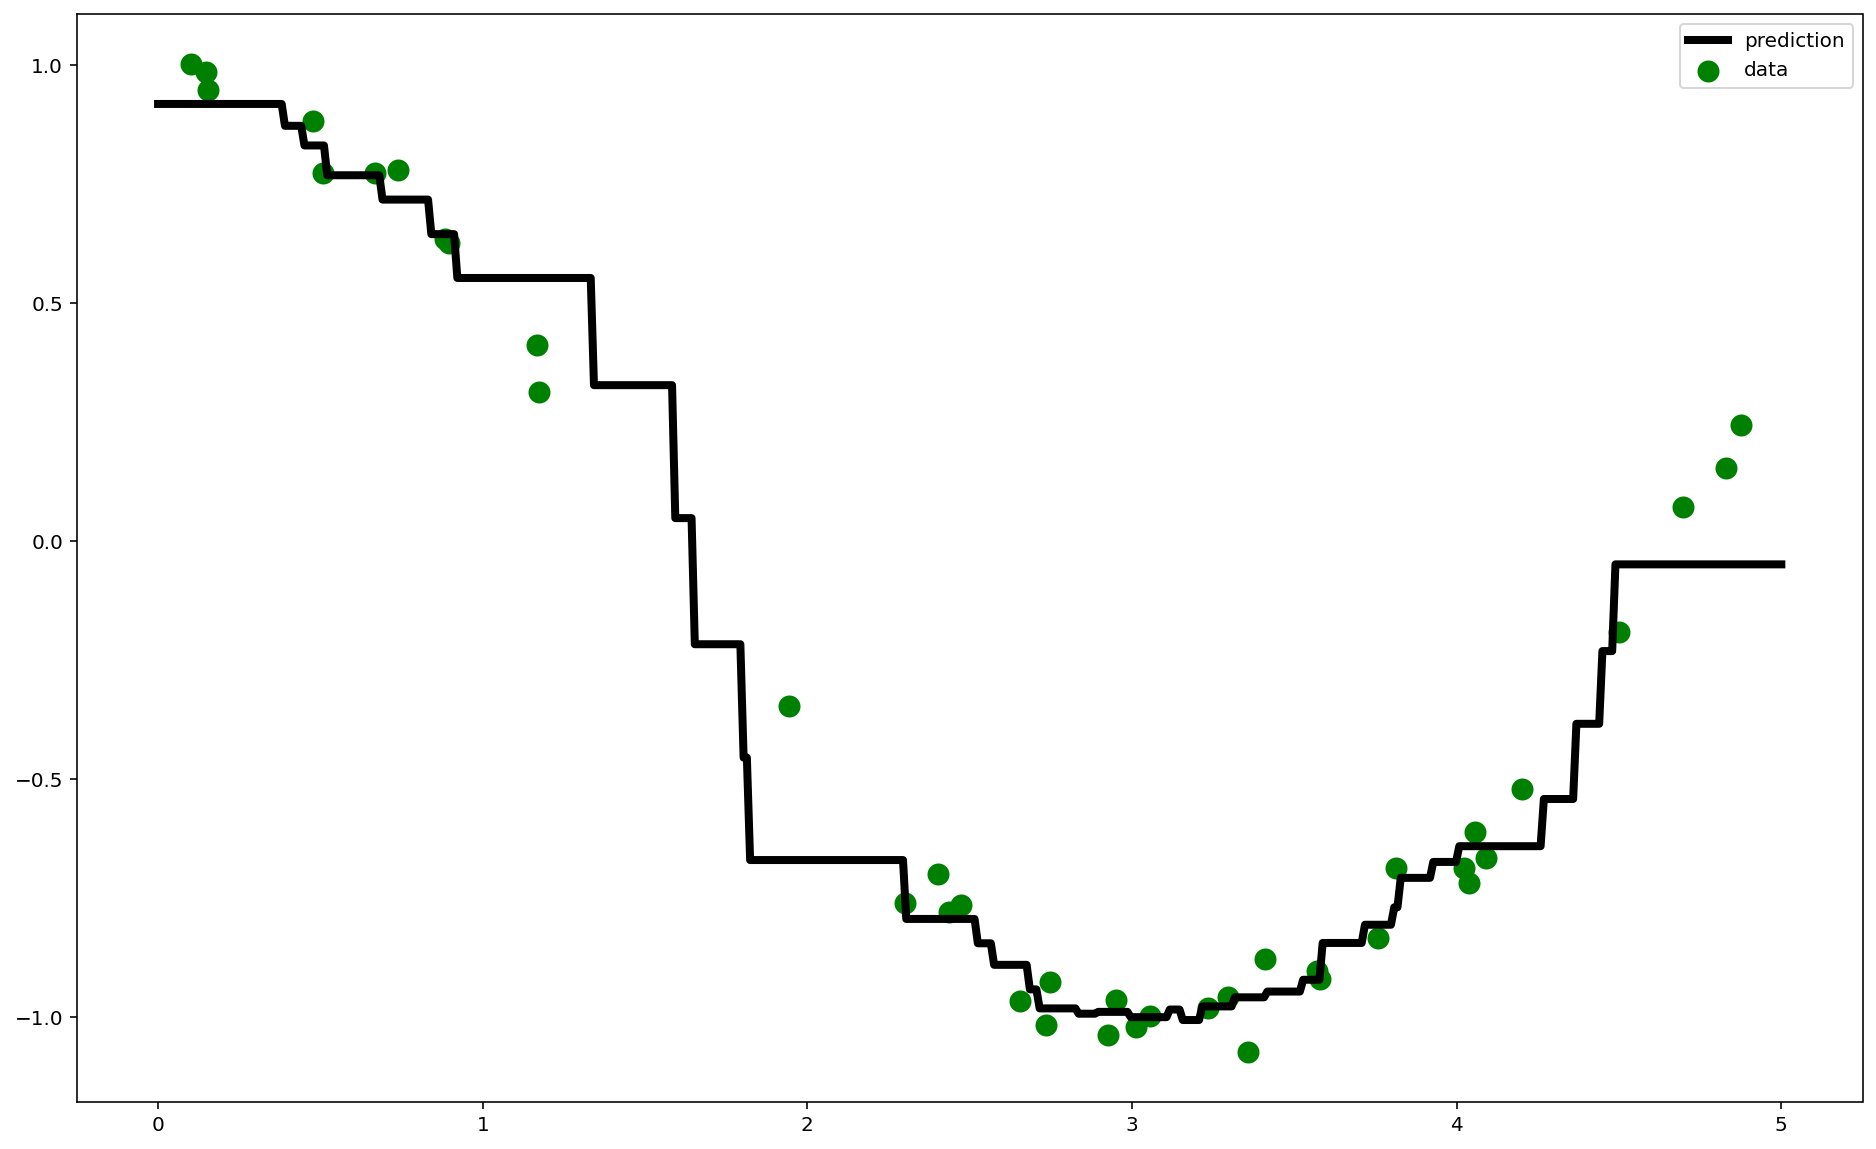

In [3]:
# 实现回归

# 生成数据
n_dots = 40
x = 5 * np.random.rand(n_dots, 1)
y = np.cos(x).ravel()
y += 0.2 * np.random.rand(n_dots) - 0.1 # 添加噪声

# 训练模型
k = 5
knn = KNeighborsRegressor(k)
knn.fit(x, y)
# 生成足够密集的点并进行预测
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
# 计算拟合曲线对训练样本的拟合准确性
knn.score(x, y)
# 画出示意图
plt.figure(figsize=(16,10), dpi=144)
plt.scatter(x, y, c='g', label='data', s=100) # 画出训练样本
plt.plot(T, y_pred, c='k', label='prediction', lw=4) # 画出拟合曲线
plt.axis('tight')
plt.legend()

